In [1]:
import pandas as pd
feature_matrix=pd.read_csv("s3://xai-datasets-868149537017/data/feature_matrix.csv")
feature_matrix.head()

,Unnamed: 0,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,...,MODE(installments.previous.NAME_PAYMENT_TYPE)_Cash through the bank,MODE(installments.previous.NAME_PRODUCT_TYPE)_walk-in,MODE(installments.previous.NAME_PRODUCT_TYPE)_x-sell,MODE(installments.previous.PRODUCT_COMBINATION)_Card Street,MODE(installments.previous.PRODUCT_COMBINATION)_Card X-Sell,MODE(installments.previous.PRODUCT_COMBINATION)_Cash X-Sell: low,MODE(installments.previous.WEEKDAY_APPR_PROCESS_START)_THURSDAY,MODE(installments.previous.WEEKDAY_APPR_PROCESS_START)_TUESDAY,MODE(installments.previous.WEEKDAY_APPR_PROCESS_START)_WEDNESDAY,TARGET
0,0,0.0,1.0,0.0,0.207607,0.090287,0.090032,0.256321,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0.0,0.0,0.286846,0.311736,0.132924,0.045016,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,1.0,0.0,0.049128,0.022472,0.020025,0.134897,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,0.0,0.128368,0.066837,0.109477,0.107023,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,1.0,0.0,0.112520,0.116854,0.078975,0.392880,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
feature_matrix.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
feature_matrix.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,MODE(installments.previous.NAME_PAYMENT_TYPE)_Cash through the bank,MODE(installments.previous.NAME_PRODUCT_TYPE)_walk-in,MODE(installments.previous.NAME_PRODUCT_TYPE)_x-sell,MODE(installments.previous.PRODUCT_COMBINATION)_Card Street,MODE(installments.previous.PRODUCT_COMBINATION)_Card X-Sell,MODE(installments.previous.PRODUCT_COMBINATION)_Cash X-Sell: low,MODE(installments.previous.WEEKDAY_APPR_PROCESS_START)_THURSDAY,MODE(installments.previous.WEEKDAY_APPR_PROCESS_START)_TUESDAY,MODE(installments.previous.WEEKDAY_APPR_PROCESS_START)_WEDNESDAY,TARGET
0,0.0,1.0,0.0,0.207607,0.090287,0.090032,0.256321,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.286846,0.311736,0.132924,0.045016,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.049128,0.022472,0.020025,0.134897,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.128368,0.066837,0.109477,0.107023,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.112520,0.116854,0.078975,0.392880,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#splitting application_train_newdf into train and test

from sklearn.model_selection import train_test_split

train,test = train_test_split(feature_matrix,test_size=.25,random_state = 123)

#separating dependent and independent variables (no under/over sampling)
train_X = train[[i for i in train.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
train_Y = train[["TARGET"]]

test_X  = test[[i for i in test.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
test_Y  = test[["TARGET"]]

In [5]:
# Down-sample Majority Class
from sklearn.utils import resample

count = train['TARGET'].value_counts()
num_majority = count[0]
num_minority = count[1]

#Number of undersampled majority class 2 x minority class
num_undersample_majority = 2 * num_minority

#separating majority and minority classes
df_majority = train[train["TARGET"] == 0]
df_minority = train[train["TARGET"] == 1]

df_majority_undersampled = resample(df_majority, replace=False,
                                   n_samples=num_undersample_majority,
                                   random_state=123)

df_undersampled = pd.concat([df_minority,df_majority_undersampled],axis=0)

#splitting dependent and independent variables

df_undersampled_X = df_undersampled[[i for i in df_undersampled.columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]]
df_undersampled_Y = df_undersampled[["TARGET"]]

In [6]:
#Model function
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_curve, auc

def model_run(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    
    accuracy = accuracy_score(dtest_Y,predictions)
    classify_metrics = classification_report(dtest_Y,predictions)
    f1=f1_score(dtest_Y,predictions)
    
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    auc_score = auc(fpr,tpr)
    
    print (algorithm)
    print ("Accuracy score : ", accuracy)
    print ("F1 score : ", f1)
    print ("AUC : ", auc_score)
    print ("classification report :\n", classify_metrics)
    
    return accuracy, classify_metrics, fpr , tpr, auc_score, f1

In [7]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
accuracy_logit, classify_metrics_logit, fpr_logit , tpr_logit, auc_score_logit, f1_logit = model_run(logit,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
Accuracy score :  0.8413850516402612
F1 score :  0.31432748538011696
AUC :  0.7657503525810871
classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.88      0.91     70609
         1.0       0.24      0.45      0.31      6269

    accuracy                           0.84     76878
   macro avg       0.59      0.66      0.61     76878
weighted avg       0.89      0.84      0.86     76878



In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
accuracy_rfc, classify_metrics_rfc, fpr_rfc , tpr_rfc, auc_score_rfc, f1_rfc = model_run(rfc,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

/opt/conda/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()
Accuracy score :  0.8846223887197898
F1 score :  0.26560688855770825
AUC :  0.7355648216327715
classification report :
               precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     70609
         1.0       0.28      0.26      0.27      6269

    accuracy                           0.88     76878
   macro avg       0.61      0.60      0.60     76878
weighted avg       0.88      0.88      0.88     76878



In [9]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
accuracy_dtc, classify_metrics_dtc, fpr_dtc , tpr_dtc, auc_score_dtc, f1_dtc = model_run(dtc,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

DecisionTreeClassifier()
Accuracy score :  0.6943078644085434
F1 score :  0.19514366930374327
AUC :  0.5850306365791418
classification report :
               precision    recall  f1-score   support

         0.0       0.94      0.72      0.81     70609
         1.0       0.12      0.45      0.20      6269

    accuracy                           0.69     76878
   macro avg       0.53      0.59      0.50     76878
weighted avg       0.87      0.69      0.76     76878



In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
accuracy_gnb, classify_metrics_gnb, fpr_gnb , tpr_gnb, auc_score_gnb, f1_gnb = model_run(gnb,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()
Accuracy score :  0.23735008715107053
F1 score :  0.16259372991501822
AUC :  0.5859396707614202
classification report :
               precision    recall  f1-score   support

         0.0       0.96      0.18      0.30     70609
         1.0       0.09      0.91      0.16      6269

    accuracy                           0.24     76878
   macro avg       0.52      0.54      0.23     76878
weighted avg       0.89      0.24      0.29     76878



In [11]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
accuracy_xgb, classify_metrics_xgb, fpr_xgb, tpr_xgb, auc_score_xgb, f1_xgb = model_run(xgb,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy score :  0.8284944977756965
F1 score :  0.3117398340032364
AUC :  0.7598236386664603
classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.86      0.90     70609
         1.0  

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
accuracy_gbc, classify_metrics_gbc, fpr_gbc, tpr_gbc, auc_score_gbc, f1_gbc = model_run(gbc,df_undersampled_X ,df_undersampled_Y ,test_X,test_Y,train_X.columns)

/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()
Accuracy score :  0.8566429927937772
F1 score :  0.32241008300030743
AUC :  0.7716018577215588
classification report :
               precision    recall  f1-score   support

         0.0       0.95      0.90      0.92     70609
         1.0       0.26      0.42      0.32      6269

    accuracy                           0.86     76878
   macro avg       0.60      0.66      0.62     76878
weighted avg       0.89      0.86      0.87     76878



In [13]:
import lightgbm as lgb
import re
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

#Split into training and evaluation sets
x_train, x_eval, y_train, y_eval = train_test_split(df_undersampled_X, df_undersampled_Y, test_size=0.2, random_state=42)

#Remove possible JSON characters
x_train = x_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
x_eval = x_eval.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
y_eval = y_eval.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# Train the model
model.fit(x_train, y_train, eval_set = [(x_eval, y_eval)], eval_names =['valid'], eval_metric ='auc', callbacks=[lgb.early_stopping(200)]);

# prediction
predictions = model.predict(test_X);
prediction_probabilities = model.predict_proba(test_X)[:,1];

# metrics
accuracy_lgbc = accuracy_score(test_Y,predictions)
classify_metrics_lgbc = classification_report(test_Y,predictions)  
fpr_lgbc , tpr_lgbc , thresholds   = roc_curve(test_Y,prediction_probabilities)
auc_score_lgbc = auc(fpr_lgbc,tpr_lgbc)
f1_lgbc=f1_score(test_Y,predictions)

/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 14807, number of negative: 29727
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.162699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105788
[LightGBM] [Info] Number of data points in the train set: 44534, number of used features: 892
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[352]	valid's auc: 0.777768	valid's binary_logloss: 0.555399


In [14]:
print ("Accuracy score : ", accuracy_lgbc)
print ("F1 score : ", f1_lgbc)
print ("AUC : ", auc_score_lgbc)
print ("classification report :\n", classify_metrics_lgbc)

Accuracy score :  0.7304820624886184
F1 score :  0.2934115400354658
AUC :  0.7781594637060237
classification report :
               precision    recall  f1-score   support

         0.0       0.96      0.73      0.83     70609
         1.0       0.19      0.69      0.29      6269

    accuracy                           0.73     76878
   macro avg       0.58      0.71      0.56     76878
weighted avg       0.90      0.73      0.79     76878



In [15]:
# Combine results together and compare stats for all

classifier_names =['Logistic Regression','Random Forest','Decision Tree','Gaussian Naive Bayes','XGBoost','Gradient Boosting','LightGBM']
accuracy_scores = [accuracy_logit, accuracy_rfc, accuracy_dtc, accuracy_gnb, accuracy_xgb, accuracy_gbc, accuracy_lgbc] 
f1_scores = [f1_logit, f1_rfc, f1_dtc, f1_gnb, f1_xgb, f1_gbc, f1_lgbc]
auc_scores = [auc_score_logit, auc_score_rfc, auc_score_dtc, auc_score_gnb, auc_score_xgb, auc_score_gbc, auc_score_lgbc]

/tmp/ipykernel_444/1238241480.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
/tmp/ipykernel_444/1238241480.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
/tmp/ipykernel_444/1238241480.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s3.set_xticklabels(s3.get_xticklabels(),rotation=90)


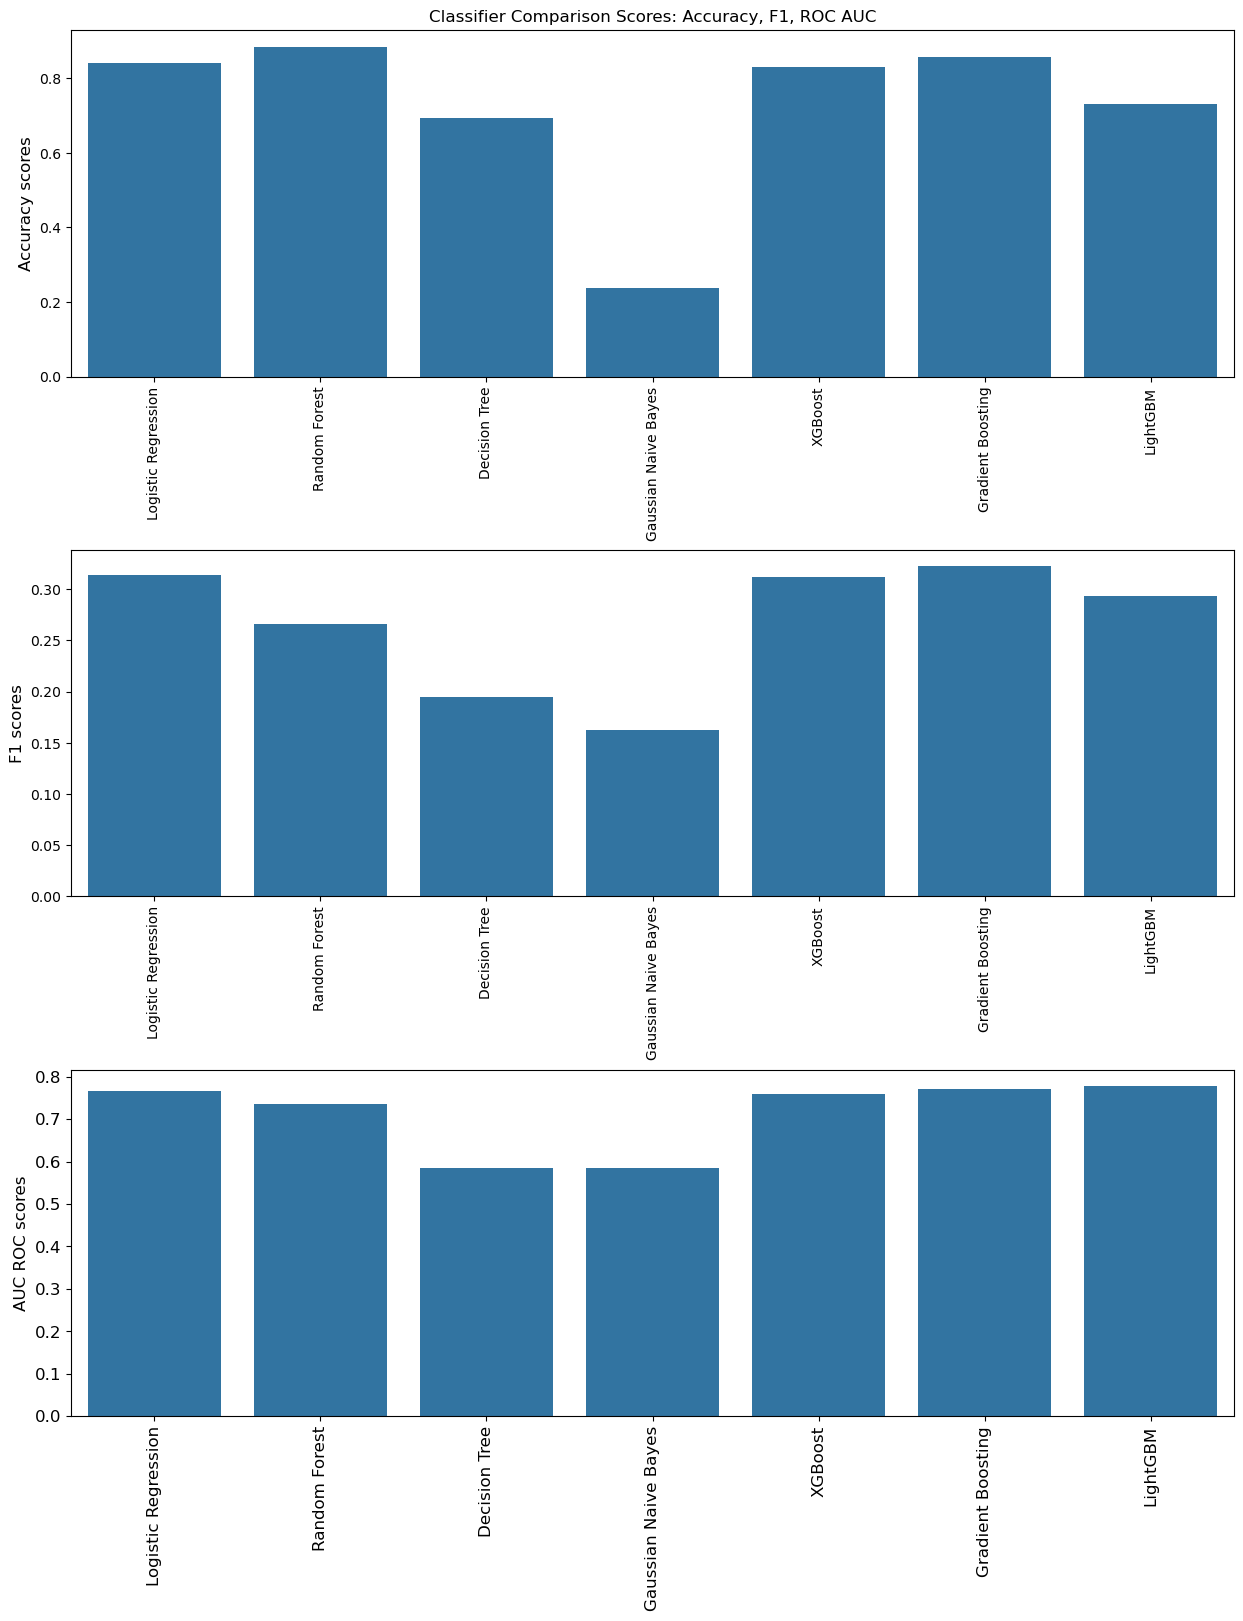

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_color_codes("colorblind")
    
plt.figure(figsize=(15,18))
plt.subplot(311)
plt.title('Classifier Comparison Scores: Accuracy, F1, ROC AUC')
s1 = sns.barplot(x = classifier_names, y=accuracy_scores)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
#s1.ylabel('accuracy scores', fontsize=12)
plt.ylabel('Accuracy scores', fontsize=12)
plt.subplot(312)
s2 = sns.barplot(x = classifier_names, y=f1_scores)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
#s2.ylabel('F1 scores', fontsize=12)
plt.ylabel('F1 scores', fontsize=12)
plt.subplot(313)
s3 = sns.barplot(x = classifier_names, y=auc_scores)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.ylabel('AUC ROC scores', fontsize=12)
   
plt.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(hspace = 0.5)
plt.show();

/tmp/ipykernel_444/1021665047.py:4: MatplotlibDeprecationWarning: Passing label as a length 3 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(fpr_logit,tpr_logit,label = [classifier_names[0], "AUC ROC :", round(auc_score_logit,3)],linewidth=2,linestyle="dotted")
/tmp/ipykernel_444/1021665047.py:5: MatplotlibDeprecationWarning: Passing label as a length 3 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(fpr_rfc,tpr_rfc,label = [classifier_names[1], "AUC ROC :", round(auc_score_rfc,3)],linewidth=2,linestyle="dotted")
/tmp/ipykernel_444/1021665047.py:6: MatplotlibDeprecationWarning: Passing label as a length 3 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current beh

Text(0, 0.5, 'True Positive Rate')

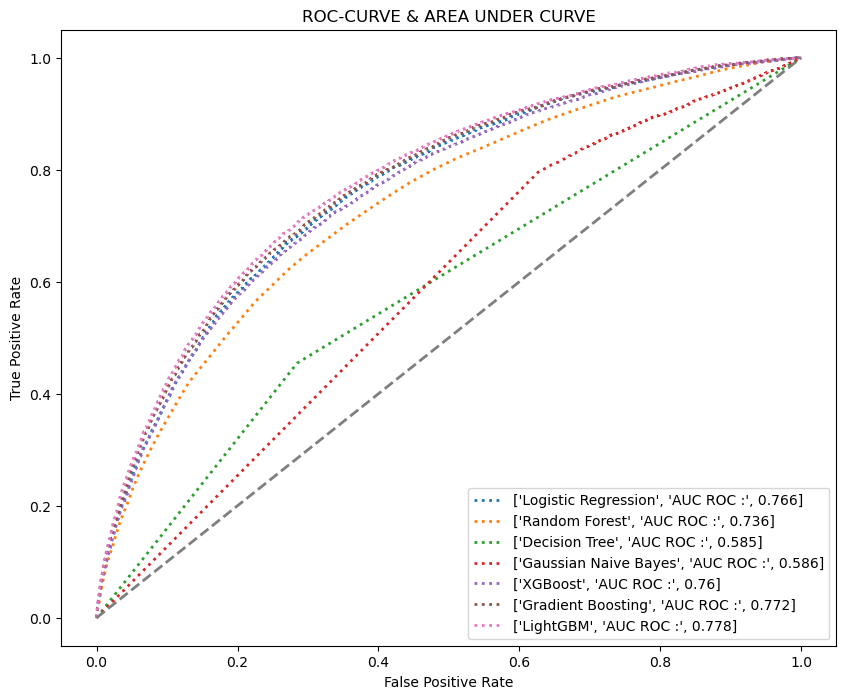

In [17]:
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
    
ax.plot(fpr_logit,tpr_logit,label = [classifier_names[0], "AUC ROC :", round(auc_score_logit,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_rfc,tpr_rfc,label = [classifier_names[1], "AUC ROC :", round(auc_score_rfc,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_dtc,tpr_dtc,label = [classifier_names[2], "AUC ROC :", round(auc_score_dtc,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_gnb,tpr_gnb,label = [classifier_names[3], "AUC ROC :", round(auc_score_gnb,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_xgb,tpr_xgb,label = [classifier_names[4], "AUC ROC :", round(auc_score_xgb,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_gbc,tpr_gbc,label = [classifier_names[5], "AUC ROC :", round(auc_score_gbc,3)],linewidth=2,linestyle="dotted")
ax.plot(fpr_lgbc,tpr_lgbc,label = [classifier_names[6], "AUC ROC :", round(auc_score_lgbc,3)],linewidth=2,linestyle="dotted")

ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
plt.legend(loc="best")
plt.title("ROC-CURVE & AREA UNDER CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [18]:
def model_classify(model_in, dtrain_X, dtrain_Y, dtest_X, dtest_Y, n_folds = 5):
    
    """Train and test a model using cross validation. 
    """
       
    # Extract the ids
    train_ids = dtrain_X.index
    test_ids = dtest_X.index
    
    print('Training Data Shape: ', dtrain_X.shape)
    print('Testing Data Shape: ', dtest_X.shape)
    
    # Extract feature names
    feature_names = list(dtrain_X.columns)
    
    # Convert to np arrays
    features = np.array(dtrain_X)
    test_features = np.array(dtest_X)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    predictions = np.zeros(test_features.shape[0])
    predictions_class = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # print model
    
    print (model_in)
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], dtrain_Y.iloc[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], dtrain_Y.iloc[valid_indices]
        
        model = model_in
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'],
                  callbacks=[early_stopping(100), log_evaluation(200)])
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions    
        predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
             
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        
        
    # Make the predictions dataframe
    test_predictions = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(dtrain_Y, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    
    # Dataframe of validation scores
    fold_scores = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    predictions_class = model.predict(test_features, num_iteration = best_iteration)

    
    fpr , tpr , thresholds   = roc_curve(dtest_Y,predictions)
    auc_roc = auc(fpr,tpr)
    f1_sc = f1_score(dtest_Y,predictions_class)
    accuracy = accuracy_score(dtest_Y,predictions_class)
    classify_metrics = classification_report(dtest_Y,predictions_class)
       
    print (model)
    
    return feature_importances, classify_metrics, fold_scores, accuracy, f1_sc, auc_roc, fpr, tpr

In [19]:
import numpy as np
from sklearn.model_selection import KFold
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import roc_auc_score
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

feature_importances, classify_metrics, fold_scores, accuracy, f1_sc, auc_score, fpr, tpr  = model_classify(model, df_undersampled_X, df_undersampled_Y, test_X, test_Y)

print('Baseline metrics')
print(fold_scores)

Training Data Shape:  (55668, 997)
Testing Data Shape:  (76878, 997)
LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=10000,
               n_jobs=-1, objective='binary', random_state=50, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)


/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 14876, number of negative: 29658
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.174164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105763
[LightGBM] [Info] Number of data points in the train set: 44534, number of used features: 888
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.863939	train's binary_logloss: 0.484633	valid's auc: 0.769305	valid's binary_logloss: 0.564076
[400]	train's auc: 0.921161	train's binary_logloss: 0.417679	valid's auc: 0.769522	valid's binary_logloss: 0.557704
Early stopping, best iteration is:
[314]	train's auc: 0.899755	train's binary_logloss: 0.444065	valid's auc: 0.770156	valid's binary_logloss: 0.559566


/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/

[LightGBM] [Info] Number of positive: 14827, number of negative: 29707
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105604
[LightGBM] [Info] Number of data points in the train set: 44534, number of used features: 891
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.862879	train's binary_logloss: 0.486318	valid's auc: 0.774352	valid's binary_logloss: 0.563271
Early stopping, best iteration is:
[232]	train's auc: 0.87386	train's binary_logloss: 0.474433	valid's auc: 0.774893	valid's binary_logloss: 0.561471


/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/

[LightGBM] [Info] Number of positive: 14813, number of negative: 29721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.166734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105565
[LightGBM] [Info] Number of data points in the train set: 44534, number of used features: 889
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.8636	train's binary_logloss: 0.485096	valid's auc: 0.769372	valid's binary_logloss: 0.5657
Early stopping, best iteration is:
[293]	train's auc: 0.893839	train's binary_logloss: 0.451391	valid's auc: 0.770572	valid's binary_logloss: 0.561296


/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/

[LightGBM] [Info] Number of positive: 14851, number of negative: 29684
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.168774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105574
[LightGBM] [Info] Number of data points in the train set: 44535, number of used features: 889
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.862436	train's binary_logloss: 0.487678	valid's auc: 0.782966	valid's binary_logloss: 0.554846
[400]	train's auc: 0.920574	train's binary_logloss: 0.419918	valid's auc: 0.782142	valid's binary_logloss: 0.547851
Early stopping, best iteration is:
[328]	train's auc: 0.902727	train's binary_logloss: 0.442119	valid's auc: 0.783775	valid's binary_logloss: 0.548909


/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/

[LightGBM] [Info] Number of positive: 14857, number of negative: 29678
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.165007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105462
[LightGBM] [Info] Number of data points in the train set: 44535, number of used features: 888
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.862336	train's binary_logloss: 0.487328	valid's auc: 0.780206	valid's binary_logloss: 0.557143
Early stopping, best iteration is:
[299]	train's auc: 0.894481	train's binary_logloss: 0.451611	valid's auc: 0.780842	valid's binary_logloss: 0.552743


/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=10000,
               n_jobs=-1, objective='binary', random_state=50, reg_alpha=0.1,
               reg_lambda=0.1, subsample=0.8)
Baseline metrics
      fold     train     valid
0        0  0.899755  0.770156
1        1  0.873860  0.774893
2        2  0.893839  0.770572
3        3  0.902727  0.783775
4        4  0.894481  0.780842
5  overall  0.892932  0.776022


Accuracy score :  0.7253180363693125
F1 score :  0.29063791192179783
AUC :  0.7824367783344403
classification report :
               precision    recall  f1-score   support

         0.0       0.96      0.73      0.83     70609
         1.0       0.18      0.69      0.29      6269

    accuracy                           0.73     76878
   macro avg       0.57      0.71      0.56     76878
weighted avg       0.90      0.73      0.79     76878



/tmp/ipykernel_444/941566647.py:8: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(fpr,tpr,label   = ["Area under curve : ",auc_score],linewidth=2,linestyle="dotted")


Text(0, 0.5, 'True Positive Rate')

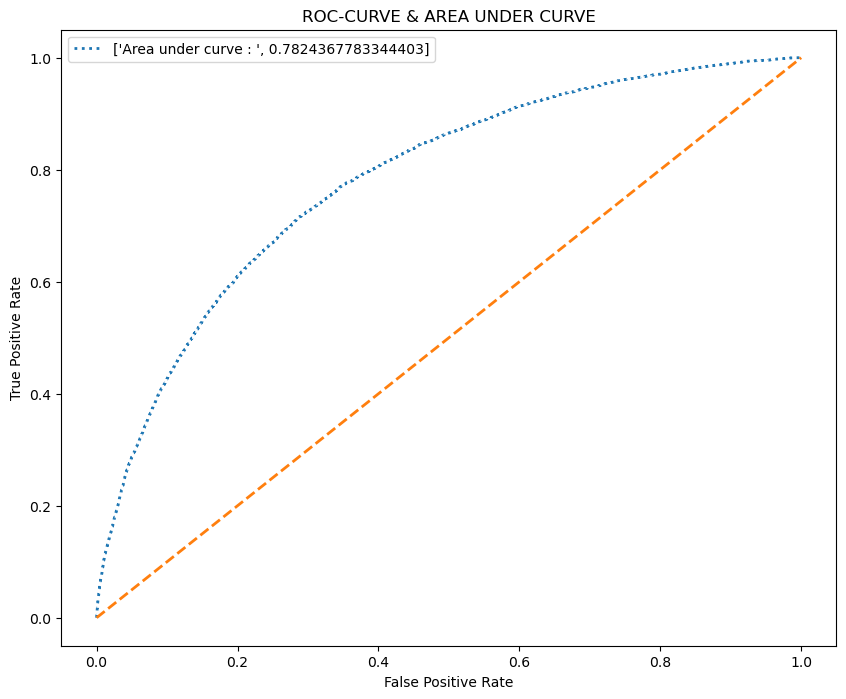

In [20]:
print ("Accuracy score : ", accuracy)
print ("F1 score : ", f1_sc)
print ("AUC : ", auc_score)
print ("classification report :\n", classify_metrics)
    
fig = plt.figure(figsize=(10,8))
ax  = fig.add_subplot(111)
ax.plot(fpr,tpr,label   = ["Area under curve : ",auc_score],linewidth=2,linestyle="dotted")
ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
plt.legend(loc="best")
plt.title("ROC-CURVE & AREA UNDER CURVE")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [22]:
import random
random.seed(50)

#Remove possible JSON characters
df_undersampled_X = df_undersampled_X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_undersampled_Y = df_undersampled_Y.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test_X = test_X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test_Y = test_Y.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# Create a training and testing dataset
train_set = lgb.Dataset(data = df_undersampled_X, label = df_undersampled_Y)
test_set = lgb.Dataset(data = test_X, label = test_Y)

In [23]:
# Hyperparameter grid
param_grid = {
    'boosting_type': ['gbdt', 'goss'],
    'num_leaves': list(range(20, 150)),
    'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
    'subsample_for_bin': list(range(20000, 300000, 20000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.6, 1, 10)),
    'subsample': list(np.linspace(0.5, 1, 100)),
    'is_unbalance': [True, False]
}

N_FOLDS = 5

In [31]:
# Dataframes for random and grid search
grid_results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                              index = list(range(MAX_EVALS)))

In [42]:
# Objective function

def objective(hyperparameters):
    """Objective function for Gradient Boosting Machine Hyperparameter Optimization.
    """
    
    # Keep track of evals
    global ITERATION
    
    ITERATION += 1
    
    print('current iteration:', ITERATION)
    
    # Using early stopping to find number of trees trained
    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
    
    if 'subsample' not in hyperparameters:  
    
        # Retrieve the subsample
        subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
    
        # Extract the boosting type and subsample to top level keys
        hyperparameters['boosting_type'] = hyperparameters['boosting_type']['boosting_type']
        hyperparameters['subsample'] = subsample
    
        # Make sure parameters that need to be integers are integers
        for parameter_name in ['num_leaves', 'subsample_for_bin', 'min_child_samples']:
            hyperparameters[parameter_name] = int(hyperparameters[parameter_name])
            

    start = timer()
    
    # Perform n_folds cross validation
    cv_results = lgb.cv(hyperparameters, train_set, num_boost_round = 10000, nfold = N_FOLDS, 
                        callbacks=[lgb.early_stopping(stopping_rounds=100)], metrics = 'auc', seed = 50)
    


    run_time = timer() - start
    
    # Extract the best score
    best_score = cv_results['valid auc-mean'][-1]
    
    # Loss must be minimized
    loss = 1 - best_score
    
    # Boosting rounds that returned the highest cv score
    n_estimators = len(cv_results['valid auc-mean'])
    
    # Add the number of estimators to the hyperparameters
    hyperparameters['n_estimators'] = n_estimators

    
    # Dictionary with information for evaluation
    dict_return = {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'train_time': run_time, 'score': best_score, 'status': STATUS_OK}

    return dict_return

In [46]:
def grid_search(param_grid, max_evals = MAX_EVALS):
    """Grid search algorithm (with limit on max evals)"""
    
    # Dataframe to store results
    results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                              index = list(range(MAX_EVALS)))
    
    # https://codereview.stackexchange.com/questions/171173/list-all-possible-permutations-from-a-python-dictionary-of-lists
    keys, values = zip(*param_grid.items())
    
    global ITERATION
    
    ITERATION = 0
    
    # Iterate through every possible combination of hyperparameters
    for v in itertools.product(*values):
        
        start = timer()
        
        # Create a hyperparameter dictionary
        hyperparameters = dict(zip(keys, v))
        
        # Set the subsample ratio accounting for boosting type
        hyperparameters['subsample'] = 1.0 if hyperparameters['boosting_type'] == 'goss' else hyperparameters['subsample']
        
        # Evalute the hyperparameters
        
        dict_return = objective(hyperparameters)
        eval_results = [dict_return['score'],dict_return['hyperparameters'],dict_return['iteration']]

           
        results.loc[ITERATION-1, :] = eval_results
        
        run_time = timer() - start
    
        print('run time:', run_time)
        
        # Normally would not limit iterations
        if ITERATION-1 > MAX_EVALS:
            break
       
    # Sort with best score on top
    results.sort_values('score', ascending = False, inplace = True)
    results.reset_index(inplace = True)
    
    return results

In [47]:
MAX_EVALS = 20
import pandas as pd
import itertools
from timeit import default_timer as timer
from hyperopt import STATUS_OK


grid_results = grid_search(param_grid)

print('The best validation score was {:.5f}'.format(grid_results.loc[0, 'score']))
print('\nThe best hyperparameters were:')

current iteration: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.170190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101432
[LightGBM] [Info] Number of data points in the train set: 44534, number of used features: 905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.155911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101432
[LightGBM] [Info] Number of data points in the train set: 44534, number of used features: 905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.159210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101432
[LightGBM] [Info] Number of data points in the train set: 44534, number of used features: 905
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.159404 seconds.

In [49]:
import pprint
pprint.pprint(grid_results.loc[0, 'params'])

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.6,
 'is_unbalance': True,
 'learning_rate': 0.004999999999999999,
 'min_child_samples': 20,
 'n_estimators': 4118,
 'num_leaves': 20,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 0.5,
 'subsample_for_bin': 20000}


In [92]:
# Dataframe of Grid search scores

scores_g = pd.DataFrame({'ROC_AUC': grid_results['score'], 'iteration': grid_results['iteration'], 'search': 'Grid'})

scores_g['ROC_AUC'] = scores_g['ROC_AUC'].astype(np.float32)
scores_g['iteration'] = scores_g['iteration'].astype(np.int32)

scores_g.head()

,ROC_AUC,iteration,search
0,0.77713,1,Grid
1,0.77713,2,Grid
2,0.77713,21,Grid
3,0.77713,20,Grid
4,0.77713,19,Grid


In [50]:
# Get the best grid parameters
grid_best_params = grid_results.loc[0, 'params']

# Create, train, test model
model = lgb.LGBMClassifier(**grid_best_params, random_state = 42)
model.fit(df_undersampled_X, df_undersampled_Y)

preds = model.predict_proba(test_X)[:, 1]

print('The best model from grid search scores {:.5f} ROC AUC on the test set.'.format(roc_auc_score(test_Y, preds)))

/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 18556, number of negative: 37112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101444
[LightGBM] [Info] Number of data points in the train set: 55668, number of used features: 907
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
The best model from grid search scores 0.78373 ROC AUC on the test set.
